# Preliminaries and Dataframe Construction

In [ ]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import Encounters from Database Query
df = pd.read_pickle("encounters.pkl")
print(df.info())

#Seaborn Formatting
plt.rcParams['font.family'] = 'Times New Roman'  # Set plt shows font to Times New Roman
plt.rcParams['axes.grid'] = True  # Ensure line graphs display on graphs
sns.set_palette(sns.color_palette('Set2')) #set color palette to a nice seaborn style https://seaborn.pydata.org/tutorial/color_palettes.html

### Basic Descriptive Statistics

In [ ]:
#Age, Initial Assessment, Initial SOFA, Survival
print(df.describe(include='all'))

#Race Stats
print(pd.concat(
    [
        df.Race.value_counts(),
        df.Race.value_counts(normalize=True)*100
    ],
    keys=['counts', '%_counts'],
    axis=1,
))

#Sex
print(pd.concat(
    [
        df.Sex.value_counts(),
        df.Sex.value_counts(normalize=True)*100
    ],
    keys=['counts', '%_counts'],
    axis=1,
))


#Age
print(pd.concat(
    [
        df.Age_Group.value_counts(),
        df.Age_Group.value_counts(normalize=True)*100
    ],
    keys=['counts', '%_counts'],
    axis=1,
))

#COVID Status
print(pd.concat(
    [
        df.COVID_Status.value_counts(),
        df.COVID_Status.value_counts(normalize=True)*100
    ],
    keys=['counts', '%_counts'],
    axis=1,
))

#NY Score
print(pd.concat(
    [
        df.NY_Score.value_counts(),
        df.NY_Score.value_counts(normalize=True)*100
    ],
    keys=['counts', '%_counts'],
    axis=1,
))

#Initial SOFA
print(pd.concat(
    [
        df.InitialSOFA.value_counts(),
        df.InitialSOFA.value_counts(normalize=True)*100
    ],
    keys=['counts', '%_counts'],
    axis=1,
))

In [26]:
##Descriptive Stats by Race

df_race = (df.replace({"Male":1, "Female":0})
           .drop(columns=["SubjectID", "Age_Group", "Ethnicity", "EncounterID"])
           .groupby(['Protocol','Race'], as_index=True, observed=True).mean()
           #.agg(['mean', 'std'], numeric_only=True)
)

print(df_race.info())

df_overall = (df.replace({"Male":1, "Female":0})
           .drop(columns=["SubjectID", "Age_Group", "Ethnicity", "EncounterID", "Race"])
           .groupby(['Protocol'], as_index=True, observed=True).mean()
           #.agg(['mean', 'std'], numeric_only=True)
)



<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7 entries, ('Baseline', '>1 Race') to ('Baseline', 'White')
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               7 non-null      float64
 1   Sex               7 non-null      float64
 2   InitialSOFA       7 non-null      float64
 3   StayLength        7 non-null      float64
 4   CCS_raw           7 non-null      float64
 5   CCS_age           7 non-null      float64
 6   CCS_Colorado      7 non-null      float64
 7   ECI_raw           7 non-null      float64
 8   LE                7 non-null      float64
 9   Cho_LE            7 non-null      float64
 10  COVID_Status      7 non-null      float64
 11  Discharge_Status  7 non-null      float64
 12  Intubation        7 non-null      float64
 13  NY_Score          7 non-null      float64
 14  Bhavani_Score     7 non-null      float64
 15  Colorado_Score    7 non-null      float64
 16  Surviv

### Age-Adjusted Rates and Confidence Intervals
Following codeblock uses the simple and age-adjusted calculator functions from ```4a_dictionaries_calculators.ipnyb``` to calculcate mean, SD and 95CIs for most of the columns in the encounter dataframe. Age-adjusted survival rates are calculated using the Tiwari mod of the Fay-Feur method. The outputs of the two calculators are concated for each sub-group analysis, which is then appended together in a single CSV. A bit messy but readable.

In [2]:
%run 4a_dictionaries_calculators.ipynb #pull functions from the age_adjusted_calculators notebook.

df_aa_overall = (pd.concat((get_raw_stats_base(df, ['Protocol']), get_age_adjusted_stats_base(df, ['Protocol'])), axis=1).reset_index())
df_aa_race = (pd.concat((get_raw_stats_base(df, ['Protocol', 'Race']), get_age_adjusted_stats_base(df, ['Protocol', 'Race'])), axis=1).reset_index())
df_age = get_raw_stats_base(df, ['Protocol', 'Age_Group']).reset_index()
df_aa_sex = (pd.concat((get_raw_stats_base(df, ['Protocol', 'Sex']), get_age_adjusted_stats_base(df, ['Protocol', 'Sex'])), axis=1).reset_index())
df_aa_COVID_Status = (pd.concat((get_raw_stats_base(df, ['Protocol', 'COVID_Status']), get_age_adjusted_stats_base(df, ['Protocol', 'COVID_Status'])), axis=1).reset_index())
df_aa_NYSOFA = (pd.concat((get_raw_stats_base(df, ['Protocol', 'NY_Score']), get_age_adjusted_stats_base(df, ['Protocol', 'NY_Score'])), axis=1).reset_index())

df_aa_surv_stats = pd.concat([df_aa_overall, df_aa_sex, df_age, df_aa_race, df_aa_COVID_Status, df_aa_NYSOFA], ignore_index=True)
                    
df_aa_surv_stats = df_aa_surv_stats.reindex(columns=(['Sex', 'Age_Group', 'Race', 'COVID_Status', 'NY_Score'] + (df_aa_surv_stats.columns.drop(['Sex', 'Age_Group', 'Race', 'COVID_Status', 'NY_Score']).tolist())))
df_aa_surv_stats.to_csv('included_stats.csv')
df_aa_surv_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Sex                   2 non-null      object  
 1   Age_Group             8 non-null      category
 2   Race                  7 non-null      object  
 3   COVID_Status          2 non-null      float64 
 4   NY_Score              3 non-null      float64 
 5   Protocol              23 non-null     object  
 6   Pop_N                 23 non-null     int64   
 7   Survived              23 non-null     int64   
 8   Age                   23 non-null     float64 
 9   Age_SD                23 non-null     float64 
 10  SOFA                  23 non-null     float64 
 11  SOFA_SD               23 non-null     float64 
 12  StayLength            23 non-null     float64 
 13  Cho_LE                23 non-null     float64 
 14  COVID_Status_mean     23 non-null     float64 
 15  CCS_raw 

### Graphs and things

<function matplotlib.pyplot.show(close=None, block=None)>

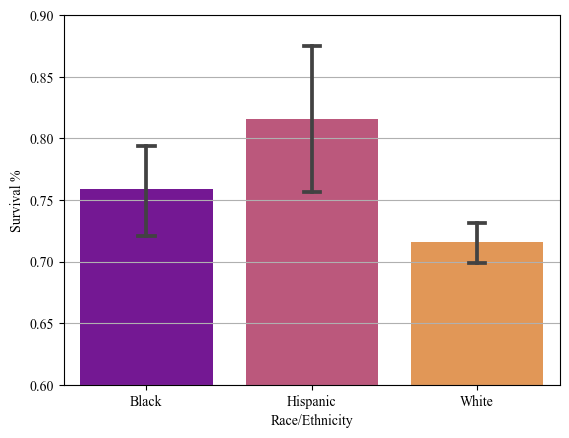

<Figure size 640x480 with 0 Axes>

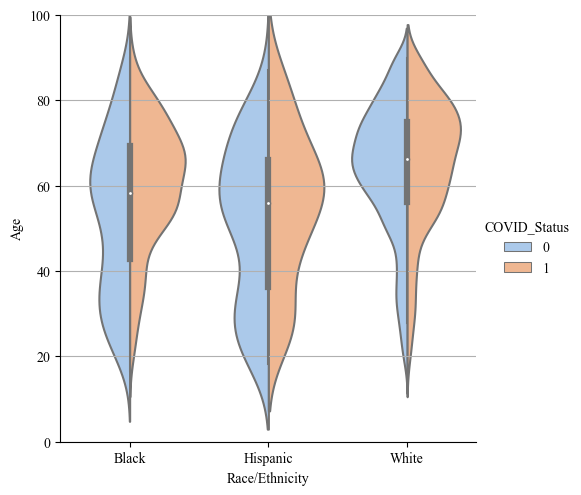

<Figure size 640x480 with 0 Axes>

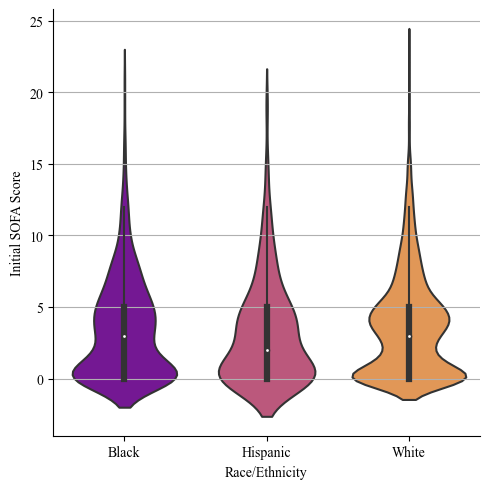

<Figure size 640x480 with 0 Axes>

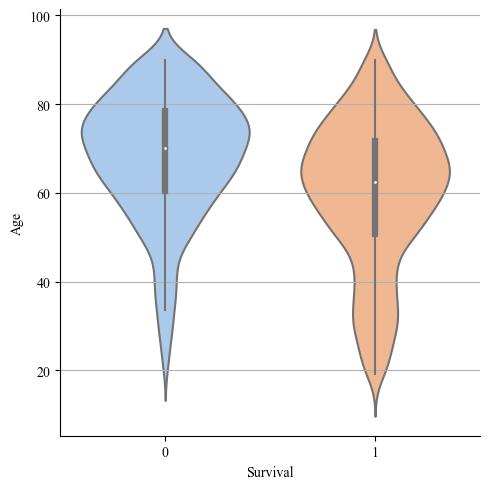

In [18]:
race_order = ['Black','Hispanic', 'White']

fig = plt.figure()
g3 = sns.barplot(y='Survived',
            x='Race',
            order = race_order, 
            data= df,
            capsize = 0.1,
            palette = 'plasma'
)
g3 = (g3.set (xlabel = "Race/Ethnicity", ylabel = "Survival %", ylim=(0.6,0.9))
)
plt.show

fig = plt.figure()
g5 = sns.catplot(data=df, 
                x="Race",
                order = race_order, 
                y="Age", 
                hue="COVID_Status",
                kind="violin", 
#                inner="stick", 
                split=True, 
                palette="pastel",
)

g5 = (g5.set (xlabel = "Race/Ethnicity", ylabel = "Age", ylim=(0,100))
)
plt.show

fig = plt.figure()
g7 = sns.catplot(data=df, 
                x="Race",
                order = race_order, 
                y="InitialSOFA",
                kind="violin", 
#                inner="stick", 
                split=True, 
                palette="plasma",
)

g7 = (g7.set (xlabel = "Race/Ethnicity", ylabel = "Initial SOFA Score")
)

plt.show
fig = plt.figure()
g6 = sns.catplot(data=df, 
                y="Age", 
                x="Survived",
                kind="violin", 
#                inner="stick", 
                split=True, 
                palette="pastel",
)

g6 = (g6.set (xlabel = "Survival", ylabel = "Age")
)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

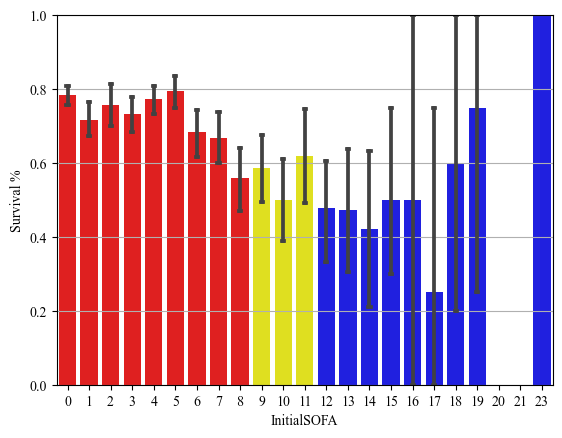

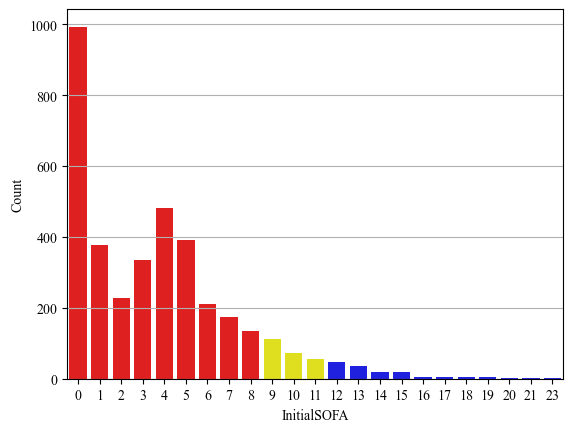

In [11]:
palette_SOFA = {c: "red" if c <=8 else "yellow" if c<12 else "blue" for c in df["InitialSOFA"].unique()}
# {'Female': 'grey', 'Male': 'r'}}

fig = plt.figure()
g5 = sns.barplot(y='Survived',
            x='InitialSOFA',
            data=df,
            capsize = 0.1,
            palette=palette_SOFA
)
g5 = (g5.set (xlabel = "InitialSOFA", ylabel = "Survival %", ylim=(0,1.0))
)
plt.show

fig = plt.figure()
g6 = sns.countplot(x='InitialSOFA',
            data=df,
            palette=palette_SOFA
)
g6 = (g6.set (xlabel = "InitialSOFA", ylabel = "Count")
)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

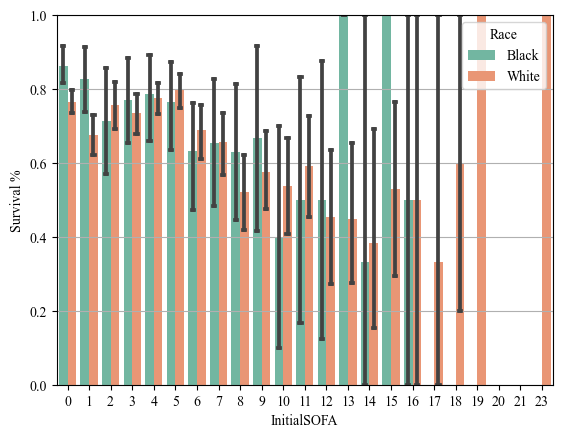

In [16]:
fig = plt.figure()
g5 = sns.barplot(y='Survived',
            x='InitialSOFA',
            hue = 'Race',
            hue_order= ['Black', 'White'],
            data=df,
            capsize = 0.1,
)
g5 = (g5.set (xlabel = "InitialSOFA", ylabel = "Survival %", ylim=(0,1.0))
)
plt.show

## COVID Pos vs COVID Neg

In [2]:
#Import Encounters from Database Query
df_diagnoses = pd.read_pickle("diagnoses_raw.pkl").rename(columns={'Encounter_Number':'EncounterID'})

df_PosCOVID = (df
      .where(df["COVID_Status"]==1)
      .dropna()
      .rename(columns={'Survived':'Actual_Survival'})
      .reindex(columns=['EncounterID', 'Age', 'Race', 'Age_Group', 'COVID_Status', 'InitialSOFA', 'NY_Score', 'Bhavani_Score', 'Colorado_Score', 'Actual_Survival'])
      .assign(Age_Group_N = lambda df_1:
            df_1['Age_Group'].map({'<25': 1, '25-34': 2, '35-44': 3, '45-54': 4, '55-64': 5, '65-74': 6, '75-84': 7, '>85': 8}).astype(int)
      )
)
#returns 1276 encounters where patient was COVID positive

df_NegCOVID = (df
      .where(df["COVID_Status"]==0)
      .dropna()
      .rename(columns={'Survived':'Actual_Survival'})
      .reindex(columns=['EncounterID', 'Age', 'Race', 'Age_Group', 'COVID_Status', 'InitialSOFA', 'NY_Score', 'Bhavani_Score', 'Colorado_Score', 'Actual_Survival'])
      .assign(Age_Group_N = lambda df_1:
            df_1['Age_Group'].map({'<25': 1, '25-34': 2, '35-44': 3, '45-54': 4, '55-64': 5, '65-74': 6, '75-84': 7, '>85': 8}).astype(int)
      )
)
#returns 2430 encounters where patient was COVID negative

In [50]:
## Reasons for admission for COVID Negative


## ICD-10 List from https://hcup-us.ahrq.gov/toolssoftware/ccsr/dxccsr.jsp
ICD_10_lookup = pd.read_csv('ICD10-CM_2018.csv')
ICD_10_CCSR = (pd.read_csv('DXtoCCSR.csv')
               .rename(columns={"ICD-10-CM Code":"ICD_10", "CCSR Category":"CCSR_Cat", "CCSR Category Description":"CCSR_Cat_Desc"})
               .reindex(columns=["ICD_10","CCSR_Cat", "CCSR_Cat_Desc"])
)
ICD_10_Acute = pd.read_csv('CCIR-v2024-1.csv')
ICD_10_Acute = (ICD_10_Acute
                #.where(ICD_10_Acute["Chronic"] == 0)
                .set_index(['ICD_10_Desc', 'Chronic'])
                .apply(lambda df_1: df_1.str.replace('\'', ''))
                .reset_index()
                .reindex(columns=['ICD_10', 'ICD_10_Desc', 'Chronic'])
)

NegCOVID_reasons = (df_diagnoses
                    #.where(df_diagnoses["dX_Name"].str.contains("acute"))
                    .dropna(subset=['ICD10_dX(s)'])
                    .merge(df_NegCOVID)
                    .rename(columns={'ICD10_dX(s)':'ICD_10'})
                    .reindex(columns=['EncounterID', 'SubjectID', 'ICD_10'])
                    .set_index(['EncounterID', 'SubjectID'])
                    .apply(lambda df_1: df_1
                        .str.split(',') #split rows that contain two or more ICD10 codes
                        .explode() # add rows
                        #.str.slice(stop=3) #truncate ICD10 to the category level (broad illness w/o sequelae)
                        #.rsplit('.', 1) #remove everything after the period
                        .str.replace('.', '') #remove period from ICD10 codes for processing by comorbidipy
                        .str.replace(' ', '')
                    )
                    .reset_index()
                    .drop_duplicates()
                    .merge(ICD_10_Acute, on=['ICD_10'], how="left")
                    .assign(Count = 1)
                    .merge(ICD_10_CCSR, on=["ICD_10"])
                    .drop_duplicates(subset=["EncounterID", "ICD_10"])
                    .groupby(by=["Chronic","CCSR_Cat", "CCSR_Cat_Desc"]).sum(numeric_only=True)
                    .reset_index()
                    #.where(['Chronic'] == 0) #isolate the acute disorders (Chornic = 0)
            )

NegCOVID_reasons.to_csv('NegCOVIDreasons.csv')
#print(NegCOVID_reasons['ICD_10'].value_counts())